### Find the best K value for the KNN algorithm for diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = pd.read_csv('E:/Academics/4_1/CSE 4112_MLL/Lab_1/diabetes.csv')
dataset.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [3]:
# #replace zeroes
# not_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# for col in not_zero:
#   dataset[col] = dataset[col].replace(0, np.NaN)
#   mean = int(dataset[col].mean(skipna=True)) #skipping where value = NaN
#   dataset[col] = dataset[col].replace(np.NaN, mean)

In [4]:
X = dataset.iloc[:, 0:8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y = dataset.iloc[:, 8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [6]:
#spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
error = []

# Calculating error for K values between 1 and 80
for i in range(1, 80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

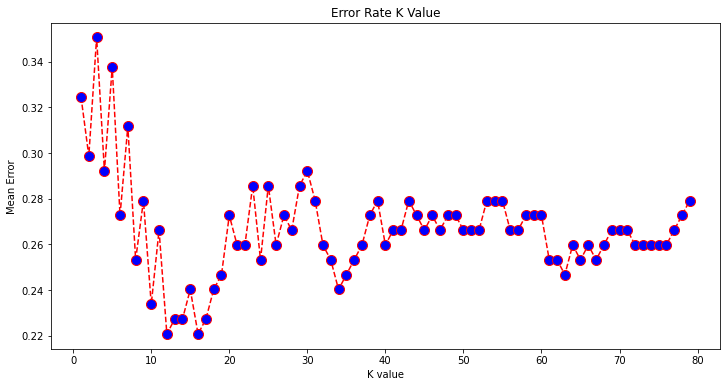

In [8]:
plt.figure(figsize = (12,6))
plt.plot(range(1,80), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [9]:
min_error = min(error)
print('Minimum Error : ' ,min(error))
min_k = error.index(min_error)
print('Best K Value : ' ,min_k+1)

Minimum Error :  0.22077922077922077
Best K Value :  12
